In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal
import core_tools as ct

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 1,
    "path": "../../",
    "exp_name": ct.generate_readable_short_id("VA_point_fix"),
    "split": "CV", #CV, random_split
    "cv_folds": 10,
    "plot": True,

    # "calib_methods": ["RF", 
    #                   "Platt", "ISO", "Beta", "CRF", "VA",
    #                   "SVM_d", "LR_d",
    #                  ],

    "calib_methods": ["RF_d", "RF_opt", "RF_large",
                      "Platt", "ISO", "Beta", "CRF", "VA",
                      "Rank"#, "Elkan", "tlr",                      
                      ],

    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1, 
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    "class1_cov_min":4, 
    "class1_cov_max":5,
    "class2_cov_min":1, 
    "class2_cov_max":2, 


    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    "opt_cv":5, 
    "opt_n_iter":40,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10,15,20,30,40,50,60,100],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    },
    # RF hyper opt
    "oob": False,
    "laplace": 0, # if set to 1, OOB must be false

    "exp_key": "max_depth",
    "exp_values":  [1,2,3,4,5,6,7,8,9,10,20] 
}

ct.save_params(params)

In [3]:
calib_results_dict, data_list = cx.run_exp(params["exp_key"], params["exp_values"], params)

exp_param 1 done
exp_param 2 done
exp_param 3 done
exp_param 4 done
exp_param 5 done
exp_param 6 done
exp_param 7 done
exp_param 8 done
exp_param 9 done
exp_param 10 done
exp_param 20 done


In [4]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [5]:
for metric in params["metrics"]:
    print(metric, " ", params["calib_methods"][tables[metric].loc["Rank"].argmin()])
    tables[metric].to_csv(f"./results/{params['exp_name']}/{metric}.csv")


acc   ISO
tce   VA
logloss   VA
brier   Beta
ece   CRF
auc   Rank


In [6]:
print(params["calib_methods"][tables["tce"].loc["Rank"].argmin()])
tables["tce"]

VA


,RF_d,RF_opt,RF_large,Platt,ISO,Beta,CRF,VA,Rank
Data,,,,,,,,,
1,0.826634,0.156474,0.119780,0.156530,0.150812,0.155328,0.155342,0.150463,5.409515
2,0.826634,0.100785,0.119780,0.094570,0.097477,0.090702,0.097895,0.069786,4.434062
3,0.826634,0.061093,0.119780,0.052431,0.142706,0.051585,0.055241,0.047238,2.412564
4,0.826634,0.039048,0.119780,0.039310,0.159936,0.036864,0.037810,0.037703,0.458411
5,0.826634,0.024410,0.119780,0.028536,0.133521,0.025234,0.023550,0.028312,0.236331
6,0.826634,0.022168,0.119780,0.028140,0.168945,0.028174,0.024734,0.027165,0.276807
7,0.826634,0.027707,0.119780,0.028827,0.131426,0.031350,0.034915,0.027463,0.185344
8,0.826634,0.050359,0.119780,0.031123,0.159379,0.040510,0.040785,0.027795,0.211157
9,0.826634,0.060399,0.119780,0.034956,0.162034,0.050698,0.061506,0.029646,0.189701


In [7]:
print(params["calib_methods"][tables["brier"].loc["Rank"].argmin()])
tables["brier"]

Beta


,RF_d,RF_opt,RF_large,Platt,ISO,Beta,CRF,VA,Rank
Data,,,,,,,,,
1,0.200192,0.224884,0.189083,0.224849,0.221285,0.224127,0.223963,0.221151,0.338331
2,0.200192,0.200779,0.189083,0.199916,0.190037,0.199215,0.200072,0.189574,0.312719
3,0.200192,0.185729,0.189083,0.182731,0.182741,0.182347,0.183330,0.181947,0.303270
4,0.200192,0.176130,0.189083,0.175790,0.177022,0.175086,0.175733,0.176589,0.236342
5,0.200192,0.170301,0.189083,0.169328,0.170527,0.168589,0.168627,0.170212,0.204802
6,0.200192,0.167636,0.189083,0.170031,0.170437,0.169344,0.169395,0.169966,0.200105
7,0.200192,0.167491,0.189083,0.169422,0.172057,0.168633,0.168159,0.171098,0.194775
8,0.200192,0.167487,0.189083,0.171088,0.172282,0.170686,0.170088,0.170983,0.192778
9,0.200192,0.170302,0.189083,0.171058,0.171883,0.170135,0.169958,0.171069,0.189927


In [8]:
print(params["calib_methods"][tables["logloss"].loc["Rank"].argmin()])
tables["logloss"]

VA


,RF_d,RF_opt,RF_large,Platt,ISO,Beta,CRF,VA,Rank
Data,,,,,,,,,
1,1.734490,0.642182,0.613802,0.642378,0.634775,0.640915,0.640631,0.634462,9.028669
2,1.734490,0.586033,0.613802,0.579402,0.593865,0.575810,0.582684,0.552517,7.468505
3,1.734490,0.545560,0.613802,0.536933,0.631661,0.536379,0.538474,0.533968,4.076915
4,1.734490,0.520789,0.613802,0.519839,0.673250,0.517150,0.518746,0.521344,1.052115
5,1.734490,0.502714,0.613802,0.504182,0.639864,0.501550,0.498382,0.504948,0.777244
6,1.734490,0.494988,0.613802,0.506480,0.711959,0.502213,0.498298,0.503025,0.826512
7,1.734490,0.494642,0.613802,0.506099,0.678153,0.502277,0.497988,0.506682,0.712095
8,1.734490,0.518199,0.613802,0.510554,0.712063,0.533572,0.526797,0.506763,0.746855
9,1.734490,0.549704,0.613802,0.510592,0.668275,0.525277,0.525650,0.506009,0.715134


In [9]:
print(params["calib_methods"][tables["ece"].loc["Rank"].argmin()])
tables["ece"]

CRF


,RF_d,RF_opt,RF_large,Platt,ISO,Beta,CRF,VA,Rank
Data,,,,,,,,,
1,0.020285,0.072240,0.023220,0.076343,0.041391,0.084266,0.069787,0.046042,0.101717
2,0.020285,0.050179,0.023220,0.062945,0.031408,0.051120,0.043503,0.028767,0.117334
3,0.020285,0.030036,0.023220,0.017611,0.032406,0.017533,0.020761,0.032636,0.156566
4,0.020285,0.021873,0.023220,0.018674,0.040504,0.016301,0.013321,0.030779,0.073729
5,0.020285,0.012079,0.023220,0.015026,0.021420,0.013647,0.013047,0.034323,0.069477
6,0.020285,0.011624,0.023220,0.010567,0.022533,0.011334,0.010201,0.037804,0.050759
7,0.020285,0.010789,0.023220,0.014216,0.038105,0.011606,0.013103,0.041817,0.043899
8,0.020285,0.011835,0.023220,0.011207,0.033164,0.010791,0.011408,0.035051,0.037054
9,0.020285,0.010540,0.023220,0.010823,0.044097,0.011968,0.010740,0.030783,0.055569


### Comparison of other metrics to TCE

In [10]:
import scipy.stats as stats
import numpy as np

tce_ranks = np.array(tables["tce"].loc["Rank"])
ece_ranks = np.array(tables["ece"].loc["Rank"])
brier_ranks = np.array(tables["brier"].loc["Rank"])
logloss_ranks = np.array(tables["logloss"].loc["Rank"])
acc_ranks = np.array(tables["acc"].loc["Rank"])
auc_ranks = np.array(tables["auc"].loc["Rank"])

tau, p_value = stats.kendalltau(tce_ranks, brier_ranks)
print(f"tau {tau} p_value {p_value}")

tau 0.6479515952918627 p_value 0.015906444101703346


In [11]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)

In [12]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF_d', 'RF_opt', 'RF_large', 'Platt', 'ISO', 'Beta', 'CRF', 'VA', 'Rank']

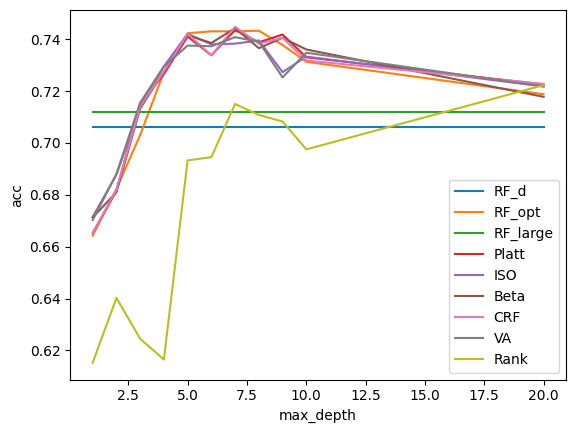

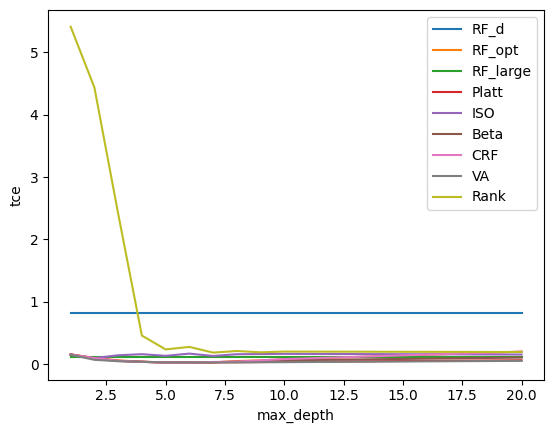

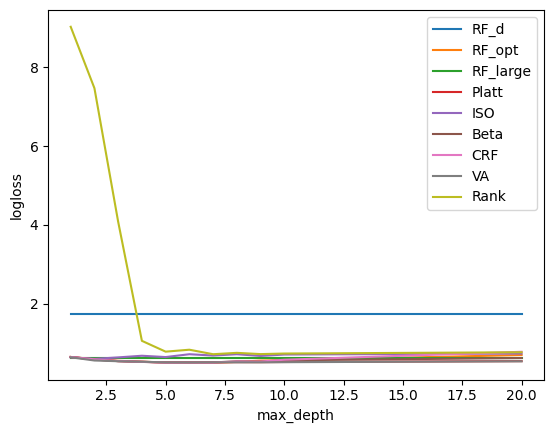

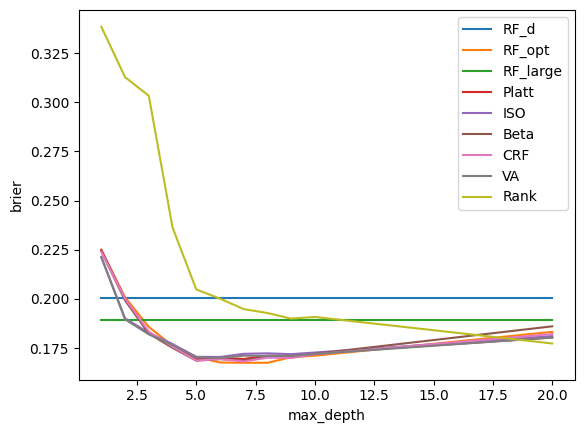

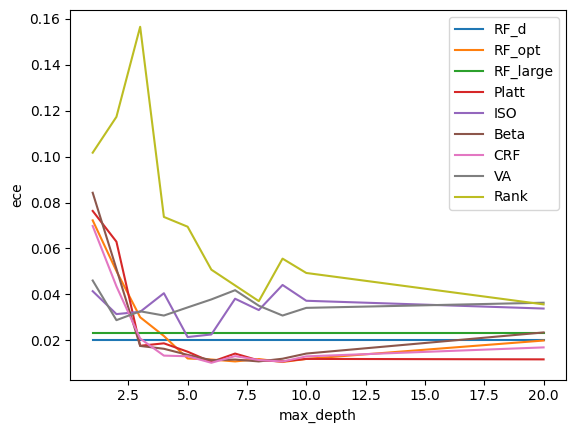

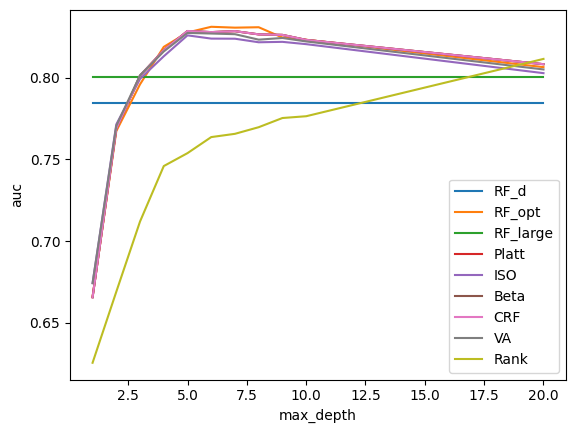

In [13]:
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(params["exp_key"])
    ax.set_ylabel(metric)